# Unsupervised NLP project

In [311]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import spacy
nlp = spacy.load('en')
import matplotlib.pyplot as plt

As a dataset for this work I've chosen the collection of about 350 articles from Medium, one of the most famous tools for spreading knowledge about AI and ML. The dataset contains articles, their title, number of claps it has received, their links and their reading time. https://www.kaggle.com/hsankesara/medium-articles

In [912]:
df = pd.read_csv('https://raw.githubusercontent.com/ISSablin/Media/master/medium_articles.csv')

In [913]:
df

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...
5,Irhum Shafkat,2K,15,https://towardsdatascience.com/intuitively-und...,Intuitively Understanding Convolutions for Dee...,The advent of powerful and versatile deep lear...
6,Sam Drozdov,2.3K,6,https://uxdesign.cc/an-intro-to-machine-learni...,An intro to Machine Learning for designers – U...,There is an ongoing debate about whether or no...
7,Conor Dewey,252,10,https://towardsdatascience.com/the-big-list-of...,The Big List of DS/ML Interview Resources – To...,Data science interviews certainly aren’t easy....
8,Abhishek Parbhakar,937,6,https://towardsdatascience.com/must-know-infor...,Must know Information Theory concepts in Deep ...,Information theory is an important field that ...
9,Aman Dalmia,2.3K,17,https://blog.usejournal.com/what-i-learned-fro...,What I learned from interviewing at multiple A...,"Over the past 8 months, I’ve been interviewing..."


Let's limit the dataset to conform the capstone requirements.

In [914]:
df.author.value_counts().head(17)

Adam Geitgey               16
Slav Ivanov                10
Arthur Juliani             10
Milo Spencer-Harper         8
Dhruv Parthasarathy         6
Netflix Technology Blog     5
Sarthak Jain                5
Stefan Kojouharov           5
Andrej Karpathy             5
Blaise Aguera y Arcas       4
Vishal Maini                4
David Venturi               4
Abhishek Parbhakar          4
Gil Fewster                 4
Eugenio Culurciello         4
Justin Lee                  4
Greg Fish                   4
Name: author, dtype: int64

In [83]:
texts = df.query('author in author.value_counts().head(17).index').text

Storing the texts to a data frame.

In [278]:
texts_base = pd.DataFrame()
texts_base['text'] = df.query('author in author.value_counts().head(17).index').text
texts_base['ath'] = df.query('author in author.value_counts().head(17).index').author
texts_base.reset_index(drop=True, inplace=True)

Appllying NLP.

In [281]:
texts_base['doc'] = [nlp(txt) for txt in texts_base.text]

Bagging.

In [282]:
def bag_of_words(text):
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]


In [283]:
texts_base['words'] = [bag_of_words(txt) for txt in texts_base.doc]

In [284]:
all_words = []
for i in range(0,texts_base.shape[0]):
    all_words += texts_base.loc[i,'words']

In [285]:
all_most_common_words = [item[0] for item in Counter(all_words).most_common(2000)]

In [286]:
for wrd in all_most_common_words:
    texts_base[wrd] = 0

In [287]:
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(texts_base['doc']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in all_most_common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            texts_base.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        print("Processing row {}".format(i))


Processing row 0
Processing row 1
Processing row 2
Processing row 3
Processing row 4
Processing row 5
Processing row 6
Processing row 7
Processing row 8
Processing row 9
Processing row 10
Processing row 11
Processing row 12
Processing row 13
Processing row 14
Processing row 15
Processing row 16
Processing row 17
Processing row 18
Processing row 19
Processing row 20
Processing row 21
Processing row 22
Processing row 23
Processing row 24
Processing row 25
Processing row 26
Processing row 27
Processing row 28
Processing row 29
Processing row 30
Processing row 31
Processing row 32
Processing row 33
Processing row 34
Processing row 35
Processing row 36
Processing row 37
Processing row 38
Processing row 39
Processing row 40
Processing row 41
Processing row 42
Processing row 43
Processing row 44
Processing row 45
Processing row 46
Processing row 47
Processing row 48
Processing row 49
Processing row 50
Processing row 51
Processing row 52
Processing row 53
Processing row 54
Processing row 55
Pr

Now we have 2000 most common words of all the texts and features engineered. Let's split the dataset.

In [300]:
Y = texts_base['ath']
X = np.array(texts_base.drop(['ath','doc','words'], 1))

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

From the very beginning let's try to predict authors using RFC.

In [326]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.9230769230769231


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Not bad at all!

In [327]:
predicted_values = rfc.predict(X_test)

In [328]:
pd.crosstab(y_test, predicted_values)

col_0,Abhishek Parbhakar,Adam Geitgey,Arthur Juliani,Blaise Aguera y Arcas,David Venturi,Dhruv Parthasarathy,Eugenio Culurciello,Gil Fewster,Greg Fish,Milo Spencer-Harper,Netflix Technology Blog,Slav Ivanov,Stefan Kojouharov,Vishal Maini
ath,,,,,,,,,,,,,,
Abhishek Parbhakar,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Adam Geitgey,0,5,0,0,0,0,0,0,0,0,0,0,0,0
Arthur Juliani,0,0,3,0,0,0,0,0,1,0,0,0,0,0
Blaise Aguera y Arcas,0,0,0,1,0,0,0,0,0,0,0,0,0,0
David Venturi,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Dhruv Parthasarathy,0,0,0,0,0,3,0,0,0,0,0,0,0,0
Eugenio Culurciello,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Gil Fewster,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Greg Fish,0,0,0,0,0,0,0,0,1,0,0,0,0,0


But it's better to do the first things first. Clastering.

In [891]:
from sklearn.cluster import SpectralClustering
n_clusters=17
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
#Predicted clusters.
predict=sc.fit_predict(X_train)

/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  n_init=n_init)


In [380]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

It looks like spectral method doesn't work well. Let's try mean shift.

In [383]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=100)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Count our clusters.
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))



Number of estimated clusters: 1


Nothing again. What about affinity propagation?

In [388]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))



Done
Estimated number of clusters: 15


Way better!

In [389]:
labels

array([ 8,  1, 10, 10,  0,  7,  1,  7, 10,  2,  1, 10,  3, 13,  7,  1,  4,
        7, 10,  5,  4,  5,  1,  1,  1,  1,  2,  1,  7, 14,  6,  1,  1,  5,
        1, 11,  7,  7,  1,  3,  1,  1,  7,  8,  7,  1,  1,  1,  9, 10,  1,
       11,  7, 10, 12, 13,  1,  2,  3,  8,  3,  1, 14,  1,  7, 10,  1,  1,
        7,  5,  1,  7, 10, 12, 13, 11])

In [892]:
y_train

6                 Adam Geitgey
101        Eugenio Culurciello
82                Sarthak Jain
80                Sarthak Jain
60           Stefan Kojouharov
95         Dhruv Parthasarathy
89         Milo Spencer-Harper
76                 Slav Ivanov
51                Adam Geitgey
27                  Justin Lee
18             Andrej Karpathy
56     Netflix Technology Blog
74                 Slav Ivanov
75       Blaise Aguera y Arcas
1           Abhishek Parbhakar
61              Arthur Juliani
42                Adam Geitgey
41                Adam Geitgey
4                 Adam Geitgey
15              Arthur Juliani
17                Adam Geitgey
40              Arthur Juliani
38         Milo Spencer-Harper
5                  Gil Fewster
93             Andrej Karpathy
59             Andrej Karpathy
0                   Justin Lee
34                   Greg Fish
28          Abhishek Parbhakar
50                Adam Geitgey
                ...           
29                 Gil Fewster
49      

In [760]:
test_labels = af.predict(X_test)

It's difficult to match predicted clusters to authors. But 1 - they are stable, 2 - let's look at results of kmeans method. 

In [747]:
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=15)
y_pred = kmns.fit_predict(X_train)

In [748]:
y_pred

array([12,  1,  0,  0, 10,  0,  1,  0,  9,  3,  1,  0,  4,  7,  1,  1,  6,
        0,  9, 13,  6, 13,  1,  1,  1,  1,  3,  1,  1,  5, 11,  1,  1, 13,
        1,  2,  0,  1,  1,  4,  1,  1,  1, 12,  1,  1,  1,  1, 14,  0,  1,
        2,  1,  0,  8,  7,  1,  3,  4, 12,  4,  1,  5,  1,  0,  0,  1,  1,
        1, 13,  1,  0,  0,  8,  7,  2], dtype=int32)

In [893]:
restab = pd.crosstab(y_pred, labels)

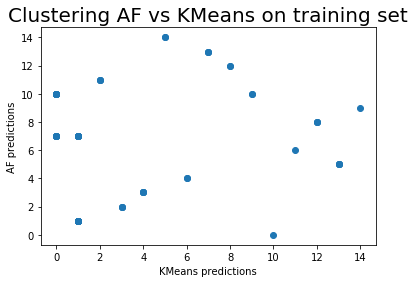

In [896]:
plt.scatter(y_pred, labels)
plt.title('Clustering AF vs KMeans on training set', fontsize=20)
plt.xlabel('KMeans predictions')
plt.ylabel('AF predictions')
plt.show()

Obviously, names of clusters are different in the two models. Let's put them along.

In [752]:
# Creating substitutions
subst = []
for i in range(0, restab.shape[0]):
    for j in range(0, restab.shape[1]):
        if restab[i][j] == restab[i].max():
            subst.append(j)

In [895]:
subst

[10, 1, 3, 4, 6, 13, 11, 1, 12, 14, 0, 2, 8, 7, 5]

In [753]:
# Applying substitutions
sub_lab=[]
for l in labels:
    sub_lab.append(subst[l])

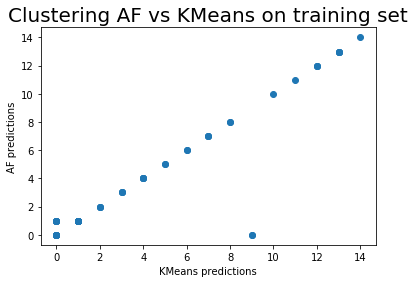

In [897]:
plt.scatter(y_pred, sub_lab)
plt.title('Clustering AF vs KMeans on training set', fontsize=20)
plt.xlabel('KMeans predictions')
plt.ylabel('AF predictions')
plt.show()

Look at that! Almost perfect! What about testing set?

In [756]:
# Predicting by KMeans
y_test_pred = kmns.predict(X_test)

In [761]:
test_restab = pd.crosstab(y_test_pred, test_labels)

In [763]:
# Applying substitution
test_sub_lab=[]
for l in test_labels:
    test_sub_lab.append(subst[l])

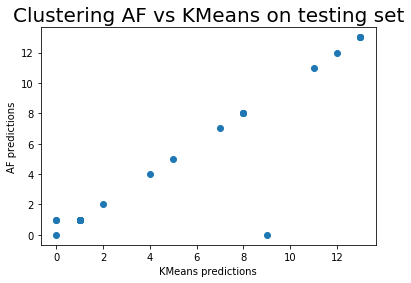

In [899]:
plt.scatter(y_test_pred, test_sub_lab)
plt.title('Clustering AF vs KMeans on testing set', fontsize=20)
plt.xlabel('KMeans predictions')
plt.ylabel('AF predictions')
plt.show()

Yes. it works. Clusters are the same.

Now we need to reduce a number of features and take the second try to predict authors. Let's use RFC in a pipeline with decomposer and normalizer.

In [871]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression

#Our SVD data reducer.  We are going to reduce the feature space.
svd= TruncatedSVD(20)
rfc_svd = ensemble.RandomForestClassifier()
lsa = make_pipeline(svd, Normalizer(copy=False), rfc_svd)

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit(X_train, y_train)



/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [884]:
print('Training set score:', X_train_lsa.score(X_train, y_train))

Training set score: 1.0


Looks good on the training set. Let's try the testing one.

In [885]:
lsa_predicted = X_train_lsa.predict(X_test)

In [886]:
pd.crosstab(y_test, lsa_predicted)

col_0,Abhishek Parbhakar,Adam Geitgey,Arthur Juliani,Blaise Aguera y Arcas,David Venturi,Dhruv Parthasarathy,Eugenio Culurciello,Gil Fewster,Greg Fish,Milo Spencer-Harper,Netflix Technology Blog,Slav Ivanov,Stefan Kojouharov,Vishal Maini
ath,,,,,,,,,,,,,,
Abhishek Parbhakar,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Adam Geitgey,0,5,0,0,0,0,0,0,0,0,0,0,0,0
Arthur Juliani,0,0,4,0,0,0,0,0,0,0,0,0,0,0
Blaise Aguera y Arcas,0,0,0,1,0,0,0,0,0,0,0,0,0,0
David Venturi,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Dhruv Parthasarathy,0,0,0,0,0,3,0,0,0,0,0,0,0,0
Eugenio Culurciello,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Gil Fewster,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Greg Fish,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [887]:
print('Testing set score:', X_train_lsa.score(X_test, y_test))

Testing set score: 1.0


Look at that! Random forest is random and fluctuates from time to time, but sometimes it gives a perfect prediction, even on just 20! features. Thank you!